In [1]:
%matplotlib ipympl

In [2]:
from matplotlib.pyplot import figure, subplots, subplot_mosaic, get_cmap, close
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from numpy import *
from numpy.linalg import *
from numpy.random import *
from numpy.fft import *

In [3]:
from pandas import read_csv, read_excel

In [5]:
_supply_df = read_csv("../data/gac_sol_1.0mw_supply-curve-aggregation.csv")
sorted_supply_df = _supply_df.sort_values(by=["capacity"])
sorted_supply_df_gids = sorted_supply_df["sc_gid"].to_numpy()
sorted_supply_df_reduced = sorted_supply_df[sorted_supply_df["capacity"] >= 1.0]
sorted_supply_df_reduced_gids = sorted_supply_df_reduced["sc_gid"].to_numpy()

In [6]:
_capacity_df = read_csv("../data/gac_sol_1.0mw_capacity_profiles.csv")
sorted_capacity_df = _capacity_df.loc[sorted_supply_df_gids]
sorted_capacity_df_reduced = sorted_capacity_df.loc[sorted_supply_df_reduced_gids]
signal_idxs = sorted_capacity_df.columns[sorted_capacity_df.columns.str.startswith('b')]
sorted_capacity_df_reduced_signals = sorted_capacity_df_reduced[signal_idxs].to_numpy()

In [7]:
low_site = roll(sorted_capacity_df_reduced_signals[0, :], -5)
median_site = roll(sorted_capacity_df_reduced_signals[len(sorted_capacity_df_reduced_signals)//2,:], -5)
high_site = roll(sorted_capacity_df_reduced_signals[-1,:], -5)

In [8]:
hours_in_day = arange(24)
days_in_year = arange(365)
HOURS, DAYS = meshgrid(days_in_year, hours_in_day, indexing="ij")

low_site_mat = low_site.reshape((365, 24))
median_site_mat = median_site.reshape((365, 24))
high_site_mat = high_site.reshape((365, 24))

# Figure S7: Estimated hourly available solar capacity generated from the proposed framework

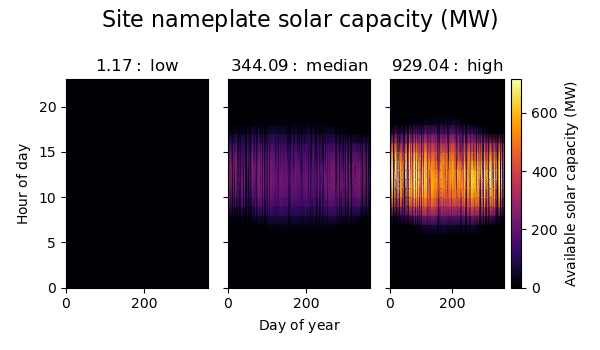

In [10]:
fig, ax = subplots(1, 3, figsize=(6, 3.5), sharex=True, sharey=True)

ax[0].pcolormesh(HOURS.T, DAYS.T, low_site_mat.T, shading="gouraud", cmap="inferno", vmin=0.0, vmax=high_site_mat.max())
ax[0].set_title(r"$" + f"{sorted_supply_df_reduced.iloc[0]['capacity']:.2f}" + r":\ \mathrm{low}$")
ax[0].set_ylabel(r"$\mathrm{Hour\ of\ day}$")

ax[1].pcolormesh(HOURS.T, DAYS.T, median_site_mat.T, shading="gouraud", cmap="inferno", vmin=0.0, vmax=high_site_mat.max())
ax[1].set_title(r"$" + f"{sorted_supply_df_reduced.iloc[len(sorted_capacity_df_reduced_signals)//2]['capacity']:.2f}" + r":\ \mathrm{median}$")
ax[1].set_xlabel(r"$\mathrm{Day\ of\ year}$")

ax[2].pcolormesh(HOURS.T, DAYS.T, high_site_mat.T, shading="gouraud", cmap="inferno", vmin=0.0, vmax=high_site_mat.max())
ax[2].set_title(r"$" + f"{sorted_supply_df_reduced.iloc[-1]['capacity']:.2f}" + r":\ \mathrm{high}$")

cbar = fig.colorbar(ScalarMappable(Normalize(vmin=0.0, vmax=high_site_mat.max()), cmap="inferno"), ax=ax[2])
cbar.set_label(r"$\mathrm{Available\ solar\ capacity\ (MW)}$")

fig.suptitle(r"$\mathrm{Site\ nameplate\ solar\ capacity\ (MW)}$", fontsize=16)

fig.tight_layout()
fig.align_labels()

fig.savefig("../figures/FigS7.pdf")